## Task 2 - Exploratory Data Analysis on Dataset - Terrorism (Intermediate)

#Author : Jisho J

##Importing packages

In [11]:
import io
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from google.colab import files
import matplotlib.pyplot as plt
%matplotlib inline

##Reading Dataset

In [13]:
data = pd.read_csv("/content/globalterrorismdb_0718dist.csv" , encoding = "iso-8859-1")
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [14]:
data.shape

(114374, 135)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114374 entries, 0 to 114373
Columns: 135 entries, eventid to related
dtypes: float64(59), int64(18), object(58)
memory usage: 117.8+ MB


In [16]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [17]:
for i in data.columns:
  print(i,end=", ")

eventid, iyear, imonth, iday, approxdate, extended, resolution, country, country_txt, region, region_txt, provstate, city, latitude, longitude, specificity, vicinity, location, summary, crit1, crit2, crit3, doubtterr, alternative, alternative_txt, multiple, success, suicide, attacktype1, attacktype1_txt, attacktype2, attacktype2_txt, attacktype3, attacktype3_txt, targtype1, targtype1_txt, targsubtype1, targsubtype1_txt, corp1, target1, natlty1, natlty1_txt, targtype2, targtype2_txt, targsubtype2, targsubtype2_txt, corp2, target2, natlty2, natlty2_txt, targtype3, targtype3_txt, targsubtype3, targsubtype3_txt, corp3, target3, natlty3, natlty3_txt, gname, gsubname, gname2, gsubname2, gname3, gsubname3, motive, guncertain1, guncertain2, guncertain3, individual, nperps, nperpcap, claimed, claimmode, claimmode_txt, claim2, claimmode2, claimmode2_txt, claim3, claimmode3, claimmode3_txt, compclaim, weaptype1, weaptype1_txt, weapsubtype1, weapsubtype1_txt, weaptype2, weaptype2_txt, weapsubtype2

##Data Cleaning

In [19]:
data=data[["iyear","imonth","iday","country_txt","region_txt","provstate","city","latitude","longitude","location","summary","attacktype1_txt","targtype1_txt","gname","motive","weaptype1_txt","nkill","nwound","addnotes"]]
data.head

<bound method NDFrame.head of         iyear  imonth  iday  ... nkill nwound addnotes
0        1970       7     2  ...   1.0    0.0      NaN
1        1970       0     0  ...   0.0    0.0      NaN
2        1970       1     0  ...   1.0    0.0      NaN
3        1970       1     0  ...   NaN    NaN      NaN
4        1970       1     0  ...   NaN    NaN      NaN
...       ...     ...   ...  ...   ...    ...      ...
114369   2013       2    11  ...   1.0    0.0      NaN
114370   2013       2    11  ...   1.0    0.0      NaN
114371   2013       2    12  ...   0.0    0.0      NaN
114372   2013       2    11  ...   1.0    0.0      NaN
114373   2013       2    11  ...   NaN    NaN      NaN

[114374 rows x 19 columns]>

In [20]:
data.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country","region_txt":"Region","provstate":"Province/State","city":"City","latitude":"Latitude","longitude":"Longitude","location":"Location","summary":"Summary","attacktype1_txt":"Attack Type","targtype1_txt":"Target Type","gname":"Group Name","motive":"Motive","weaptype1_txt":"Weapon Type","nkill":"Killed","nwound":"Wounded","addnotes":"Add Notes"},inplace=True)
data.head

<bound method NDFrame.head of         Year  Month  Day  ... Killed Wounded Add Notes
0       1970      7    2  ...    1.0     0.0       NaN
1       1970      0    0  ...    0.0     0.0       NaN
2       1970      1    0  ...    1.0     0.0       NaN
3       1970      1    0  ...    NaN     NaN       NaN
4       1970      1    0  ...    NaN     NaN       NaN
...      ...    ...  ...  ...    ...     ...       ...
114369  2013      2   11  ...    1.0     0.0       NaN
114370  2013      2   11  ...    1.0     0.0       NaN
114371  2013      2   12  ...    0.0     0.0       NaN
114372  2013      2   11  ...    1.0     0.0       NaN
114373  2013      2   11  ...    NaN     NaN       NaN

[114374 rows x 19 columns]>

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114374 entries, 0 to 114373
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Year            114374 non-null  int64  
 1   Month           114374 non-null  int64  
 2   Day             114374 non-null  int64  
 3   Country         114374 non-null  object 
 4   Region          114374 non-null  object 
 5   Province/State  113955 non-null  object 
 6   City            113940 non-null  object 
 7   Latitude        110236 non-null  float64
 8   Longitude       110235 non-null  float64
 9   Location        26079 non-null   object 
 10  Summary         48245 non-null   object 
 11  Attack Type     114374 non-null  object 
 12  Target Type     114374 non-null  object 
 13  Group Name      114374 non-null  object 
 14  Motive          40303 non-null   object 
 15  Weapon Type     114373 non-null  object 
 16  Killed          107604 non-null  float64
 17  Wounded   

In [22]:
data.shape

(114374, 19)

In [23]:
data.isnull().sum()

Year                   0
Month                  0
Day                    0
Country                0
Region                 0
Province/State       419
City                 434
Latitude            4138
Longitude           4139
Location           88295
Summary            66129
Attack Type            0
Target Type            0
Group Name             0
Motive             74071
Weapon Type            1
Killed              6770
Wounded            10308
Add Notes         102235
dtype: int64

In [24]:
data["Killed"]=data["Killed"].fillna(0)
data["Wounded"]=data["Wounded"].fillna(0)
data["Casualty"]=data["Killed"]+data["Wounded"]
data.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded,Casualty
count,114374.000000,114374.000000,114374.000000,110236.000000,1.102350e+05,114374.000000,114374.000000,114374.000000
mean,1995.393770,6.439121,15.321620,21.788839,-7.682808e+02,2.159503,2.966601,5.126104
std,11.686701,3.405855,8.822325,20.994431,2.595832e+05,10.795549,42.264627,49.057164
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1986.000000,4.000000,8.000000,7.807736,-6.977965e+01,0.000000,0.000000,0.000000
50%,1994.000000,6.000000,15.000000,28.949134,3.088444e+01,0.000000,0.000000,1.000000
75%,2008.000000,9.000000,23.000000,35.724533,6.714331e+01,1.000000,1.000000,3.000000
max,2013.000000,12.000000,31.000000,74.633553,1.793667e+02,1384.000000,8191.000000,9574.000000


#Observation
  1.The data consists of terrorist activities ranging from the year: 1970 to 2013

  2.Maximum number of people killed in an event were: 1384

  3.Maximum number of people wounded in an event were: 8191

  4.Maximum number of total casualties in an event were: 9574


##Visualising the data

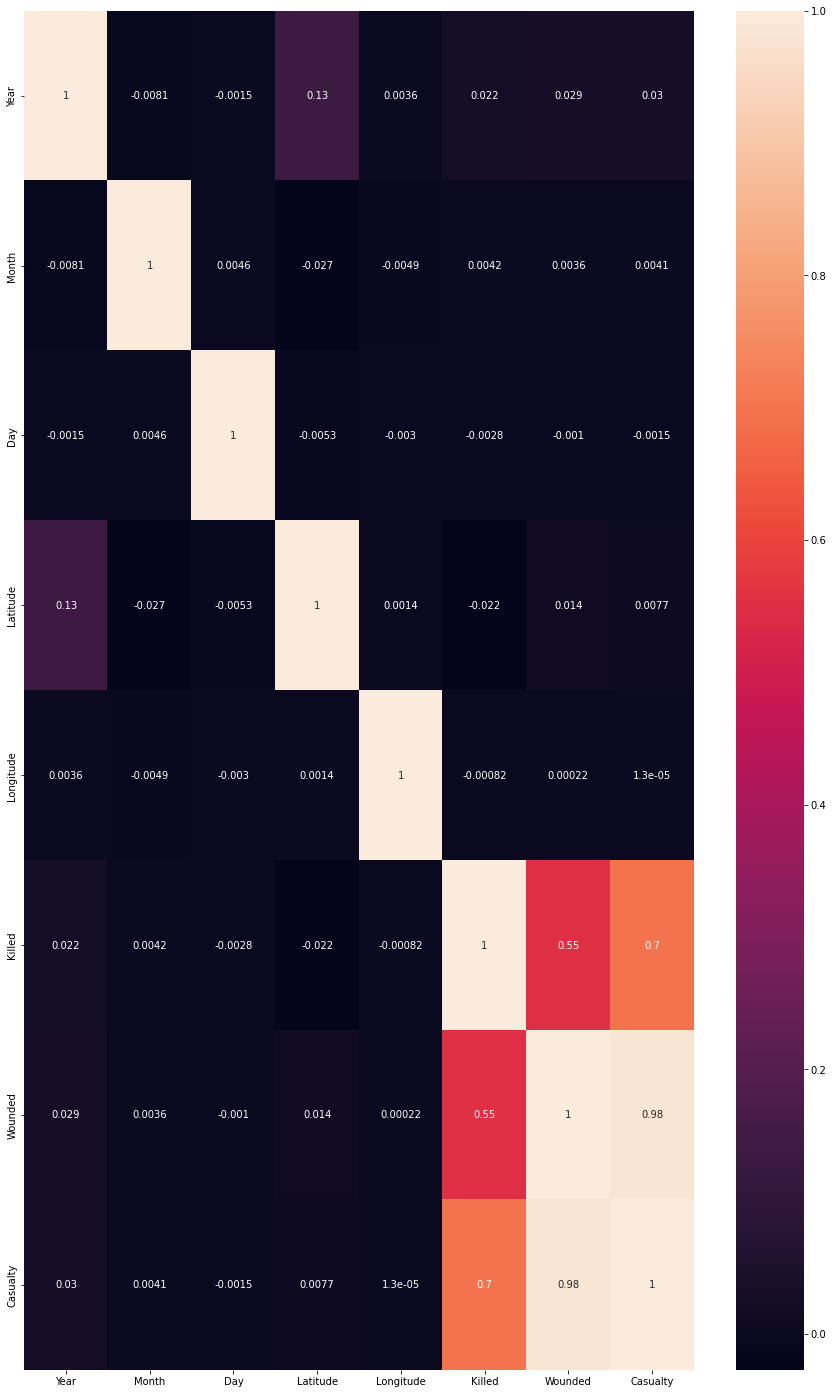

In [26]:
fig,axes = plt.subplots(1,1,figsize=(15,25))
sns.heatmap(data.corr(), annot=True)
plt.show()

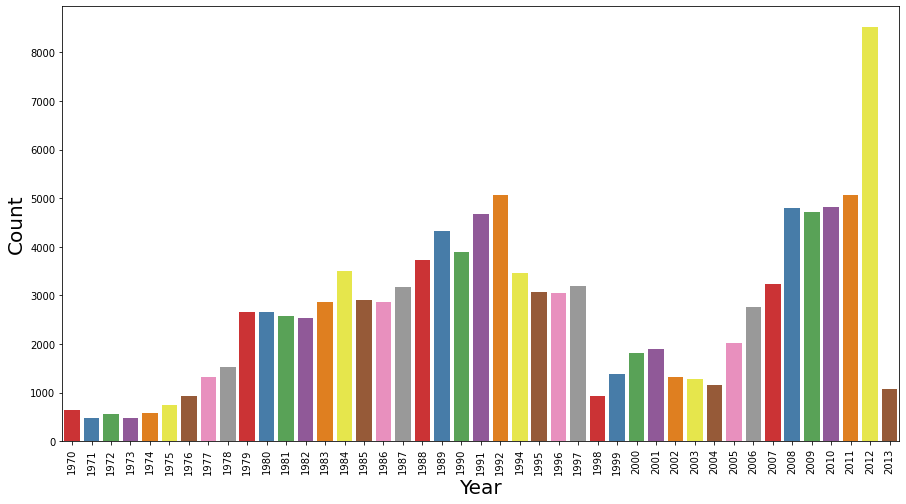

In [28]:
plt.figure(figsize=(15,8))
sns.countplot(data = data, x = "Year",palette= "Set1")
plt.xticks(rotation=90)
plt.xlabel("Year",size=20)
plt.ylabel("Count",size=20)
plt.show()

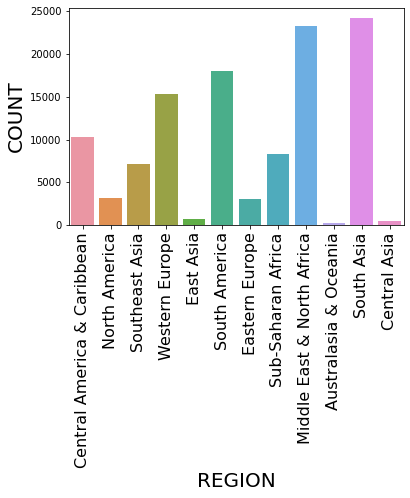

In [29]:
sns.countplot(data = data, x='Region')
plt.xticks(size = 16,rotation=90)
plt.xlabel("REGION",size=20)
plt.ylabel("COUNT",size=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


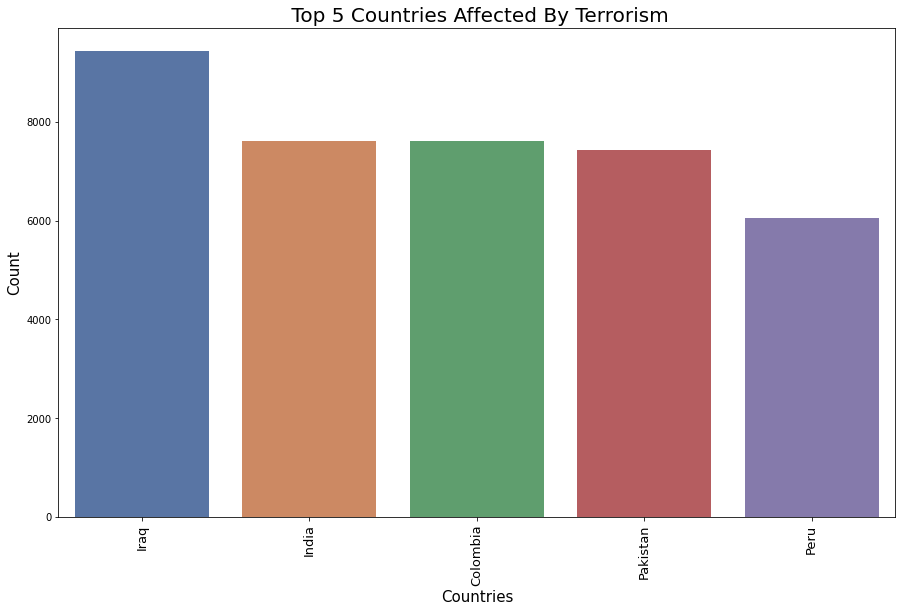

In [30]:
plt.figure(figsize=(15,9))
x = data['Country'].value_counts().index[:5]
y = data['Country'].value_counts().values[:5]
sns.barplot(x,y,palette='deep')
plt.title(' Top 5 Countries Affected By Terrorism',size=20)
plt.xlabel('Countries',size=15)
plt.ylabel('Count',size=15)
plt.xticks(size=13,rotation= 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


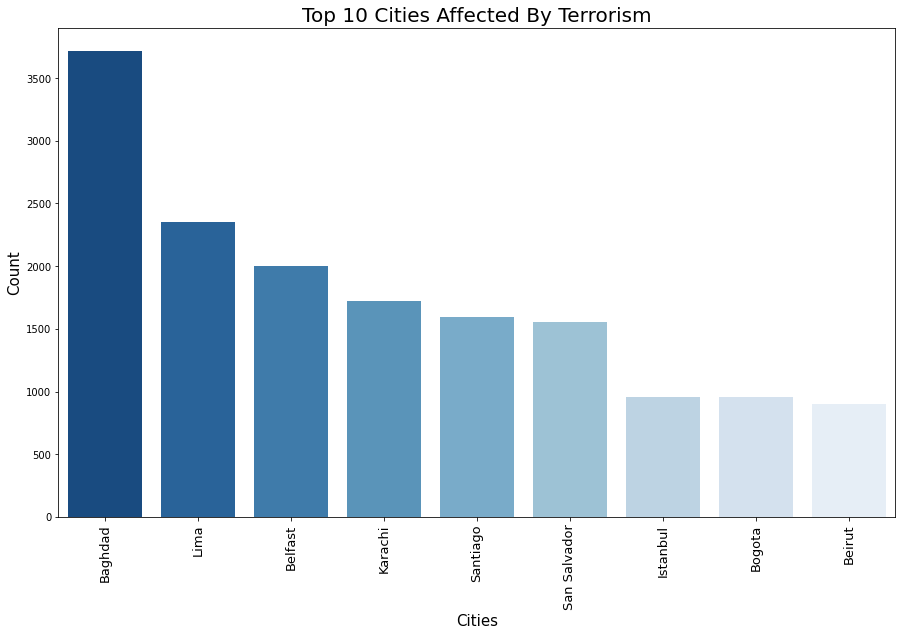

In [32]:
plt.figure(figsize=(15,9))
x =data['City'].value_counts().index[1:10]
y =data['City'].value_counts().values[1:10]
sns.barplot(x,y,palette='Blues_r')
plt.title('Top 10 Cities Affected By Terrorism',size=20)
plt.xlabel('Cities',size=15)
plt.ylabel('Count',size=15)
plt.xticks(size=13,rotation= 90)
plt.show()

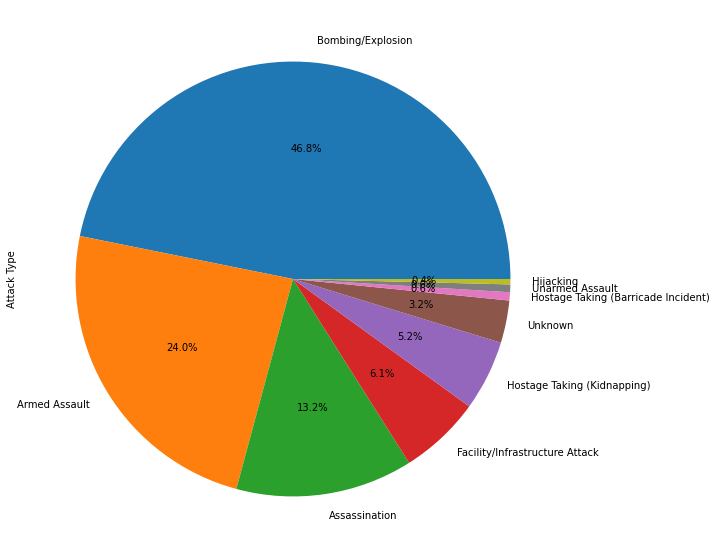

In [34]:
plt.figure(figsize=(10,10))
data['Attack Type'].value_counts().plot.pie(autopct ="%1.1f%%")
plt.show()

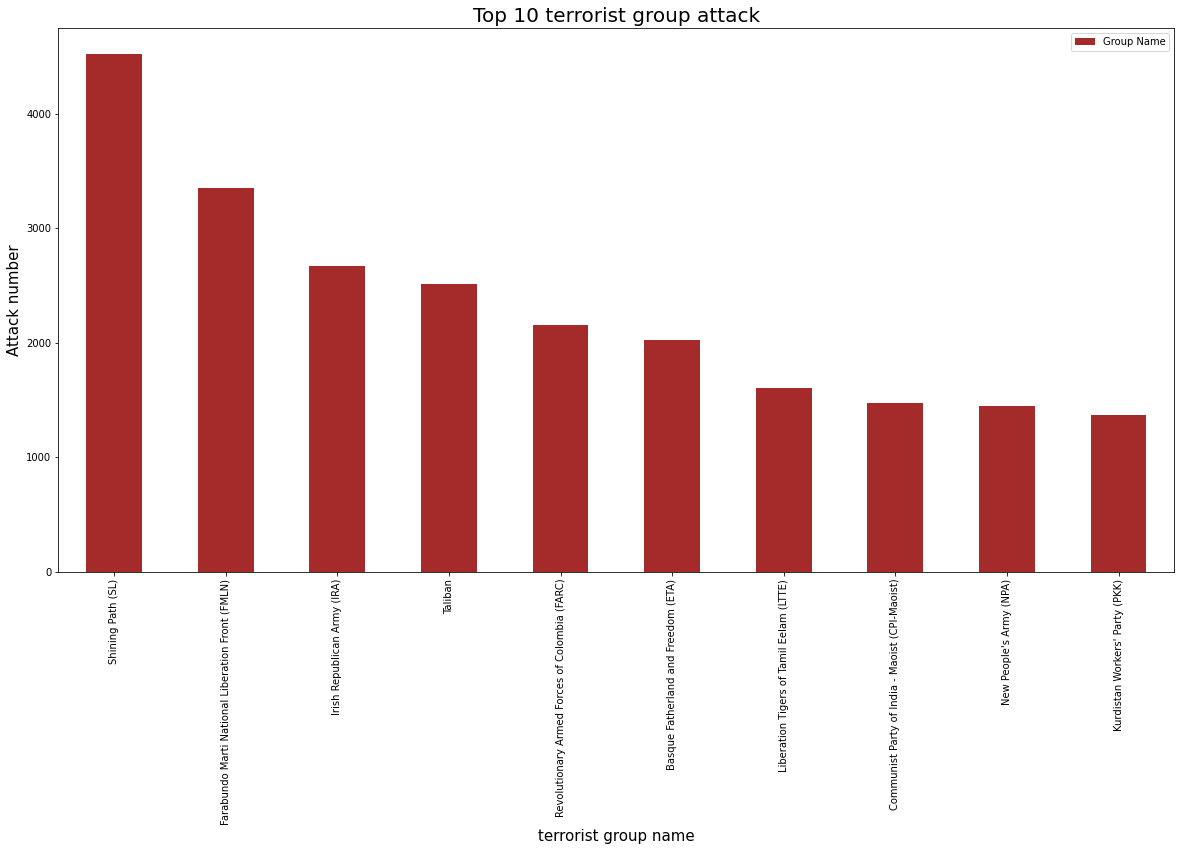

In [36]:
data['Group Name'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='brown',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("Attack number",fontsize=15)
plt.show()

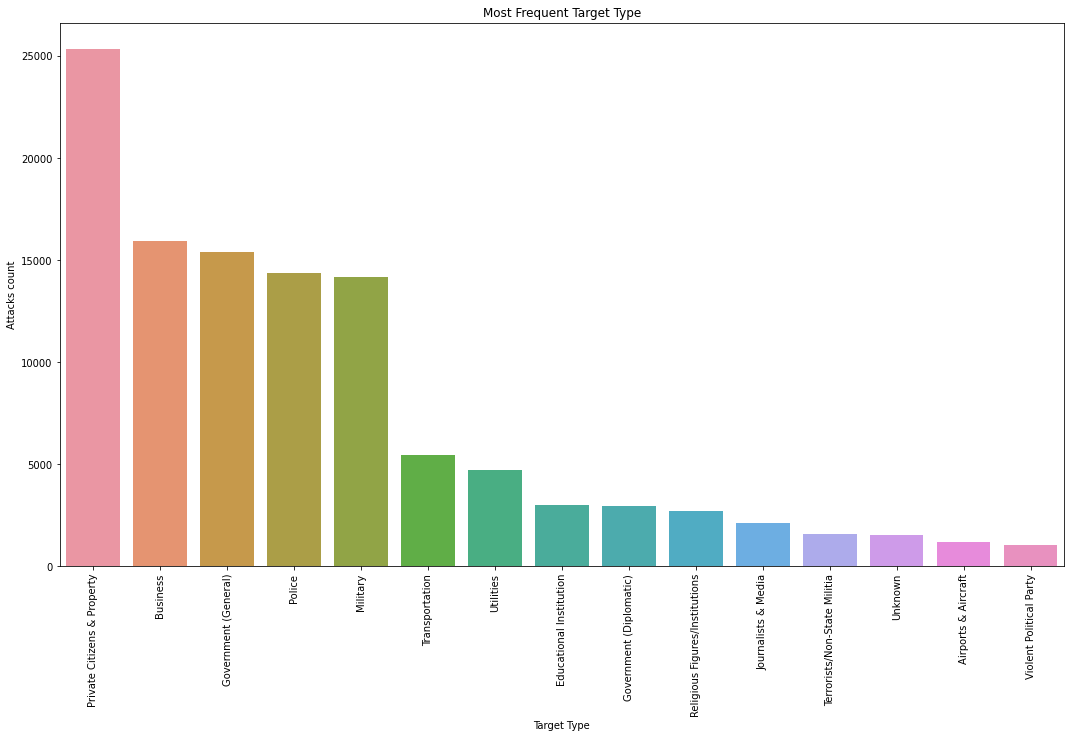

In [40]:
Target = data['Target Type'].value_counts().nlargest(n=15)
plt.figure(figsize= (18,10))
sns.barplot(x = Target.index , y = Target.values)
plt.title('Most Frequent Target Type')
plt.xlabel('Target Type')
plt.ylabel('Attacks count')
plt.xticks(rotation = 90)
plt.show()